## Dataanalyse

Vi analyserer nå et datasett. Først må vi laste inn data, og deretter visualiserer vi deler av datasettet.

For å demonstrere på offentlig tilgjengelig data som det er enkelt å forholde seg til laster vi ned meteologisk temperaturdata for Bergen.

Først importerer vi funksjonalitet vi trenger. Modulen `pandas` blir importert med det korte navnet `pd` og modulen `meteostat` blir importert.

Pandas gir oss alt vi kan gjøre med regneark i python. Meteostat lar oss laste ned meteologisk data i formatet som brukes i `pandas`. Vi impoterer også numpy til senere bruk og vi importerer `datetime` som lar oss gir oss verktøy til å regne med tid i timer, dager, år og så videre.

In [1]:
# Her importeres Point og Daily funksjonalitetene fra meteostat modulen.
# Hvis meteostat ikke allerede er installert blir den installert.

try:
  import meteostat as ms
except:
  !pip install meteostat==2.0.0
  import meteostat as ms

In [2]:
# Her importeres modulen pandas som pd

import pandas as pd

In [3]:
# Vi importerer numpy til bruk senere

import numpy as np

In [4]:
# Her importeres funksjonaliteten datetime fra modulen datetime.
# Datetime gir oss en bekvem måte å jobbe med tidsdate på.

from datetime import datetime, timedelta

In [5]:
# Sett tidsperioden vi vil hente data fra
# Data for fremtiden kan ikke lastes inn, så når vi ber om å laste inn data får vi data helt opp til i dag.

start = datetime(1973, 1, 1)
end = datetime.today()

In [6]:
# Vi angir GPS koordinatene til Bergen
# Google maps gir oss koordinatene under. Høyden gjetter jeg meg til.

realfagsbygget = ms.Point(60.38526, 5.328060, 10)

In [7]:
stations = ms.stations.nearby(realfagsbygget, limit=4)

In [8]:
stations

,name,country,region,latitude,longitude,elevation,timezone,distance
id,,,,,,,,
01317,Bergen / Florida,NO,HO,60.3833,5.3333,12,Europe/Oslo,361.1
01311,Bergen / Flesland,NO,HO,60.2833,5.2333,5,Europe/Oslo,12479.4
01314,Fossmark / Stanghelle,NO,HO,60.5206,5.7247,10,Europe/Oslo,26448.4
01327,Kvamskogen-jonshogdi / Kleivi,NO,HO,60.3886,5.9639,455,Europe/Oslo,34938.6


In [9]:
bergen = ms.stations.meta(station='01317')

In [10]:
bergen

Station(id='01317', name='Bergen / Florida', country='NO', region='HO', identifiers={'wmo': '01317', 'ghcn': 'NO000050540', 'usaf': '013170', 'national': 'SN50540'}, latitude=60.3833, longitude=5.3333, elevation=12, timezone='Europe/Oslo')

In [11]:
# Vi laster ned timebaserte målinger for den angitte tidsperioden
ms.config.block_large_requests = False
data = ms.hourly(bergen, start, end)
data = data.fetch()

La oss spørre hva data er for noe.

In [12]:
data

,temp,rhum,prcp,snwd,wdir,wspd,wpgt,pres,tsun,cldc,coco
time,,,,,,,,,,,
1973-01-01 00:00:00,6.0,93,<NA>,<NA>,170,29.5,<NA>,1019.4,<NA>,8,<NA>
1973-01-01 03:00:00,7.0,93,<NA>,<NA>,170,9.0,<NA>,1019.6,<NA>,8,<NA>
1973-01-01 06:00:00,<NA>,<NA>,<NA>,<NA>,180,13.0,<NA>,1019.0,<NA>,8,<NA>
1973-01-01 09:00:00,7.0,87,<NA>,<NA>,160,20.2,<NA>,1019.6,<NA>,8,<NA>
1973-01-01 12:00:00,8.0,87,<NA>,<NA>,170,27.7,<NA>,1019.1,<NA>,8,<NA>
...,...,...,...,...,...,...,...,...,...,...,...
2026-01-15 16:00:00,4.9,90,0.2,<NA>,151,28.1,54.0,999.1,<NA>,8,7
2026-01-15 17:00:00,5.0,89,0.2,<NA>,151,29.9,54.7,999.7,<NA>,8,7
2026-01-15 18:00:00,5.2,91,0.5,<NA>,150,28.8,54.7,1000.4,<NA>,8,8


#### Hva er det vi plotter under?

<Axes: xlabel='time'>

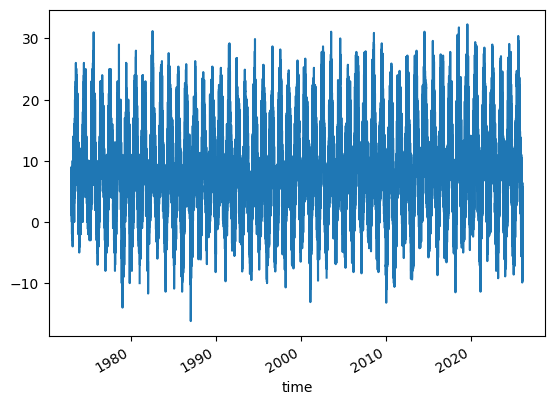

In [13]:
temperaturer = data['temp']
temperaturer.plot()

#### Stemmer data under overens med hva du har erfart?

In [14]:
temp_siste_to_uker = temperaturer.loc[end - timedelta(days=14): end]

<Axes: xlabel='time'>

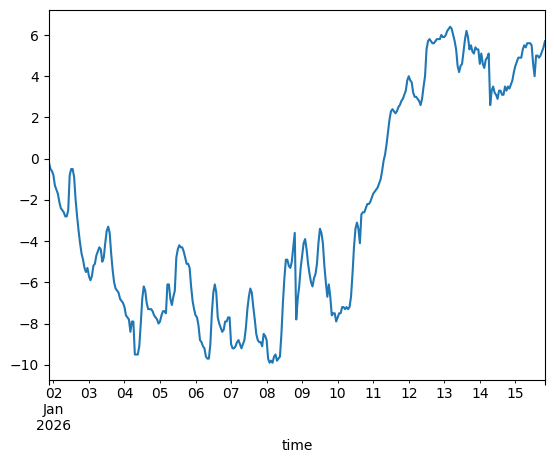

In [15]:
temp_siste_to_uker.plot()

In [16]:
# Døgn gjennomsnittstemperatur de siste to ukene.

døgn_gjennomsnitt_temp_siste_to_uker = temp_siste_to_uker.resample('D').mean()
døgn_gjennomsnitt_temp_siste_to_uker

,temp
time,
2026-01-01,-0.433333
2026-01-02,-2.654167
2026-01-03,-5.2375
2026-01-04,-7.7875
2026-01-05,-6.008333
2026-01-06,-8.158333
2026-01-07,-8.395833
2026-01-08,-7.370833
2026-01-09,-5.5375


<Axes: xlabel='time', ylabel='daglig gjennomsnittstemperatur'>

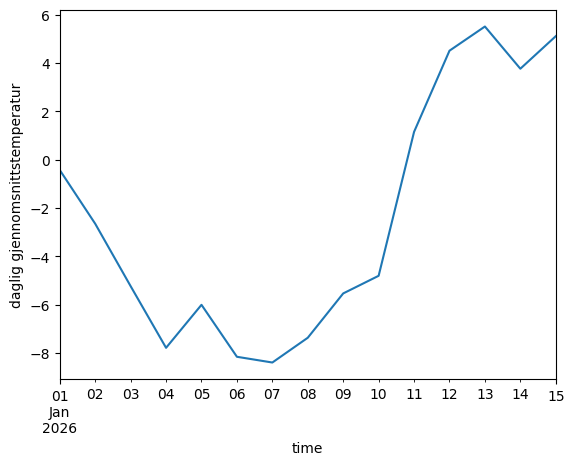

In [17]:
# Plot daglig gjennomsnittstemperatur de siste to ukene.

døgn_gjennomsnitt_temp_siste_to_uker.plot(ylabel='daglig gjennomsnittstemperatur')

<Axes: xlabel='time', ylabel='temperatur'>

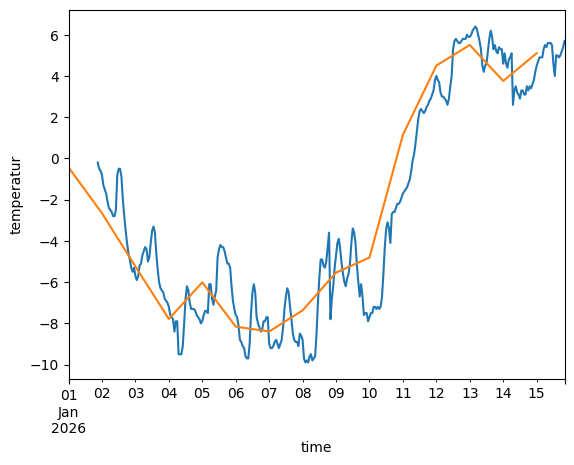

In [18]:
#Begge plott i samme figur

temp_siste_to_uker.plot()

døgn_gjennomsnitt_temp_siste_to_uker.plot(ylabel='temperatur')

### Spørsmål:

Hva kan du si om temperaturen i Bergen når du ser på figuren over?

Er der et spørsmål om temperaturen i Bergen du kunne ønske å få når hvis du kjenner temperaturene helt siden 1973?

### Oppgave

Hva var temperaturene i Bergen i to-ukers perioden ett år tidligere enn perioden vi plottet temperaturer for over?

### Pandas datatyper
La oss igjen spørre litt om hva `data` egentlig er for noe. Enkleste måte å gjøre det på er ved å skrive `data` til python og se hva som skjer.

In [19]:
data

,temp,rhum,prcp,snwd,wdir,wspd,wpgt,pres,tsun,cldc,coco
time,,,,,,,,,,,
1973-01-01 00:00:00,6.0,93,<NA>,<NA>,170,29.5,<NA>,1019.4,<NA>,8,<NA>
1973-01-01 03:00:00,7.0,93,<NA>,<NA>,170,9.0,<NA>,1019.6,<NA>,8,<NA>
1973-01-01 06:00:00,<NA>,<NA>,<NA>,<NA>,180,13.0,<NA>,1019.0,<NA>,8,<NA>
1973-01-01 09:00:00,7.0,87,<NA>,<NA>,160,20.2,<NA>,1019.6,<NA>,8,<NA>
1973-01-01 12:00:00,8.0,87,<NA>,<NA>,170,27.7,<NA>,1019.1,<NA>,8,<NA>
...,...,...,...,...,...,...,...,...,...,...,...
2026-01-15 16:00:00,4.9,90,0.2,<NA>,151,28.1,54.0,999.1,<NA>,8,7
2026-01-15 17:00:00,5.0,89,0.2,<NA>,151,29.9,54.7,999.7,<NA>,8,7
2026-01-15 18:00:00,5.2,91,0.5,<NA>,150,28.8,54.7,1000.4,<NA>,8,8


Hvis vi vil vite litt mere om hva `data` er for noe kan vi spørre om typen til `data`.

In [20]:
type(data)

pandas.core.frame.DataFrame

Vi får å vite at `data` er en `DataFrame`. Dette er det næmeste vi kommer på et exel regneark i python.
Et regneark kan leses inn i en `DataFrame` i python og en `DataFrame` kan eksporteres til en excel fil.

Ser vi på informasjonen i `data` ser vi at det står `NA` på mange plasser. Det betyr at vi mangler data på disse
plassene. Vi kan spørre hvor mange ganger det står `NA` i `temp` kolonnen:

Samme spørsmål for `temperaturer`

In [21]:
type(temperaturer)

pandas.core.series.Series

In [22]:
temperaturer

,temp
time,
1973-01-01 00:00:00,6.0
1973-01-01 03:00:00,7.0
1973-01-01 06:00:00,<NA>
1973-01-01 09:00:00,7.0
1973-01-01 12:00:00,8.0
...,...
2026-01-15 16:00:00,4.9
2026-01-15 17:00:00,5.0
2026-01-15 18:00:00,5.2


Det er kjedelig. Det står `NA` i kolonnen `temp`!

Hvor mange ganger?

In [23]:
temperaturer.isna().sum()

np.int64(570)

### Spørsmål:

Er der noen meningsfulle tall vi kan skrive inn på de plassene der informasjon mangler?

Hva skjer i linjen under?

Bruk gjerne KI til å finne et svar!

In [24]:
time_temperaturer = temperaturer.resample('h').ffill()

<Axes: xlabel='time', ylabel='temp'>

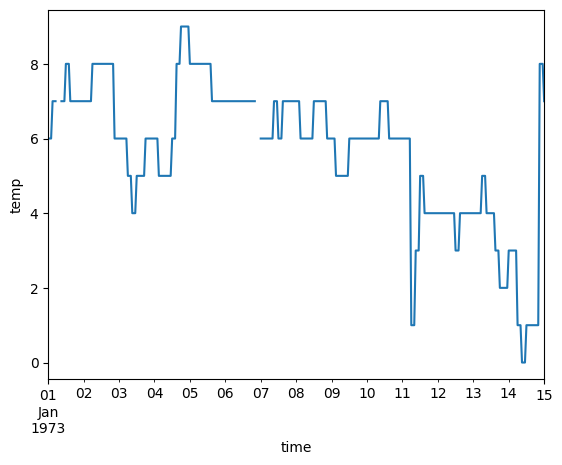

In [25]:
time_temperaturer.loc[start: start + timedelta(days=14)].plot(ylabel='temp')

In [26]:
time_temperaturer_ffill = time_temperaturer.ffill()

<Axes: xlabel='time', ylabel='temp'>

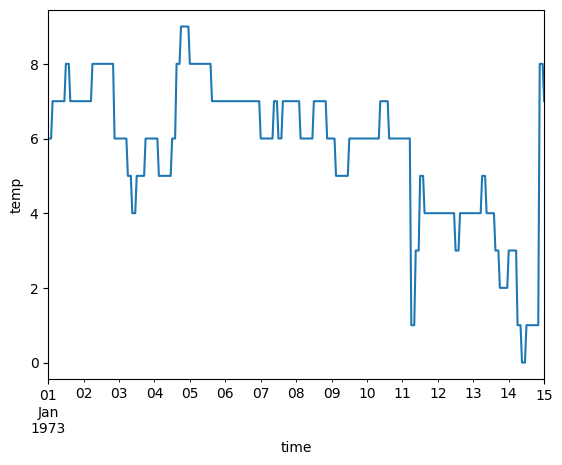

In [27]:
time_temperaturer_ffill.loc[start: start + timedelta(days=14)].plot(ylabel='temp')

### Spørsmål:

Hva forteller figuren under til oss?

In [28]:
rullende_temperaturer = time_temperaturer_ffill.rolling(20*365*24).mean()

<Axes: xlabel='time'>

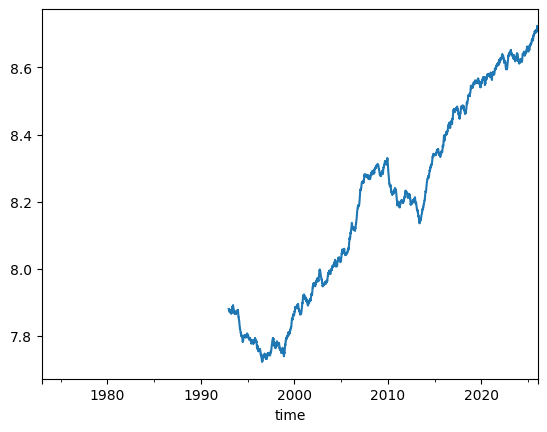

In [29]:
rullende_temperaturer.plot()

### Oppgave:

Lag en figur som forteller hvordan tiårlig gennomsnittstemperatur endrer seg?